**Unsupervised Learning Techniques**

**Clustering Algorithms: k-means and DBSCAN**

Clustering: - The task of identifying similar instances and assigning them to clusters, or groups of similar instances. Just like in classification, each instance gets assigned to a group. 

Clustering - used in a wide variety of applications, including:
- Customer segmentation => 
- Data Analysis => 
- Dimensionality Reduction => Can measure each instance's affinity within each cluster. Affinity is a measure of how well an instance fits into a cluster; Each instance's feature vector x can then be replaced with the vector of the cluster's affinities. If there are k-clusters, then this vector is k-dimensional. The new vector is typically much lower than the original feature vector. but it can preserver enough information for further processing.

Feature Engineering:
- Cluster affinities can often be useful as extra features

Anomaly detection:
- Any instance with low affinity to all clusters is likely to be an anomaly. 

Semi-supervised learning
- Few labels? - Perform clustering and propagate the labels to all instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm and thus improve performance.

Search engines:
- Search engines let you search for images - similar to a reference image. To build such a system - you would first apply a clustering algo to all images in your db. 

Image segmentation:
- By clustering pixels according to color, then replacing each pixel's color with  the mean color of its cluster, its possible to considerably reduce the number of different colors in an image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

No universal definition of what a cluster is - depends on the context and different algorithms will capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, etc. 

**K-Means:**
Originally built to be used for pulse code modulation. 

In [1]:
from sklearn.cluster import KMeans

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

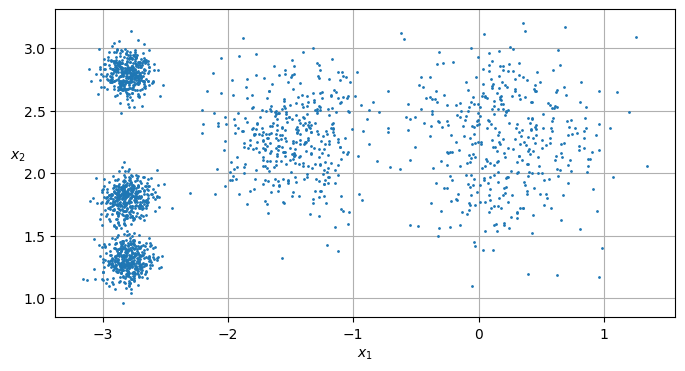

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [6]:
X.shape, type(X)

((2000, 2), numpy.ndarray)

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance will be assigned to one of the 5 clusters. In the context of clustering, an instance's label is the index of the cluster to which the algorithm assigns this instance. Kmeans instance preserves the predicted labels of the instances it was trained on via the labels_ instance variable

In [8]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [9]:
y_pred is kmeans.labels_

True

We can also take a look at the 5 centroids the algorithm found. 

In [10]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

You can easily assign new instances to the cluster whose centroid is closest:

In [11]:
import numpy as np 

In [12]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [13]:
X_new.shape

(4, 2)

In [14]:
kmeans.predict(X_new)

array([1, 1, 2, 2])

The K-Means algorithm does not behave very well when the blobs have different diameters - because all it cares about when assigning an instance to a cluster is the distance to the centroid.

**meaning might be useful when using k-means to standardize your data**

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster - soft clustering. This score can be the distance between the instance and th centroid or a similarity score (or affinity), such as the Gaussain radial basis function. In k-means the transform method measures the distance from each instance to every centroid.

In [15]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

above can help with soft clustering. If you have a high dimensional dataset and transform it this way, you could end up with a k-dimensional dataset - this transformation can be a very efficient nonlinear dimensionality reduction technique. Alternatively - these distances can be used as exra features to train another model.

Risk with kmeans:
- although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e. it may converge to a local optimum): whether it does or not depends on the centroid initialization. 

**Centroid Initialization Steps:**

If you happen to know approximately where the centroids should be (e.g. if you ean another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1.

In [16]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [17]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336]])

Another soln - run the algo multiple times with different random initializations and keep the best solution. Number of random initializations is controlled by the n_init hyperparameter. By default - 10. algo runs 10 times when you call fit(), and sklearn keeps the best solution. Uses a performance metric called intertia to keep the best solution. Inertia - sum of the squared distances between the instances and their closest centroids. 

A model's inertia is accessible via the inertia_ instance variable:

In [18]:
kmeans.inertia_

211.5985372581684

score() mtd returns the negative inertia. (sklearn rule of greater is better)

In [19]:
kmeans.score(X)

-211.59853725816836

**Accelerated k-means and mini-batch kmeans:**
- instead of using the full dataset at each iteration, the algo is capable of using mini-batches, moving the centroids just slightly at each iteration
- this speeds up the algo and makes it possible to cluster huge datasets.
- sklearn implements with the MiniBatchKMeans class:

In [20]:
from sklearn.cluster import MiniBatchKMeans

In [21]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)

In [22]:
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

**Finding the optimal number of clusters:**
- Plot the inertia as a function of k - get a curve with an inflexion point called an elbow.
- Elbow point usually signals to a good cluster number. 
- This technique for choosing the best value for the number of clusters - rather coarse
- A more precise (but also more computationally expensive) approach is to use the silhouette score - which is the mean silhouette coefficient over all instances
- An instance's silhouette coefficient is equal to (b-a)/max(a,b) where a is the mean distance to other instances in the same cluster(mean intra cluster distance) and b is the mean nearest-cluster distance (mean distance to the instances of the next closest cluster). Silhouette coefficient varies between -1 and 1. Coefficient close to +1 means instance is well within its own cluster, while 0 means its close to a cluster boundary. -1 means it was assigned to the wrong cluster. 

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

Limits of k-means:
- needs to be run several times to avoid sub-optimal solutions
- need to specify clusters
- doesn't perform well when clusters have varying sizes, different densities, or non spherical shapes
- For elliptical clusters, Gaussian Mixture models work best

**Its important to scale the input features before running k-means or the clusters may be very stretched and k-means will perform poorly. Scaling the features does not guarantee that all clusters will be nice and spherical but does help k-means**

**Using Clustering for Image Segmentation:**
- We look at the simple task of color segmentation using k-means.
- Pixels with a similar colir get assigned to the same segment. 

In [25]:
import PIL

In [26]:
filepath = r"C:\Users\blais\Documents\ML\data\images\ladybug.png"

In [27]:
image = np.asarray(PIL.Image.open(filepath))

In [28]:
image.shape

(533, 800, 3)

The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using k-means with 8 clusters. it creates a segmented_img array containing the nearest cluster center for each pixel. (mean color of each pixel's cluster). and lastly reshapes the array to the original image shape.

In [29]:
X = image.reshape(-1,3)

In [30]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [37]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [38]:
segmented_img = segmented_img.reshape(image.shape)

In [32]:
kmeans.labels_

array([1, 1, 1, ..., 4, 1, 1])

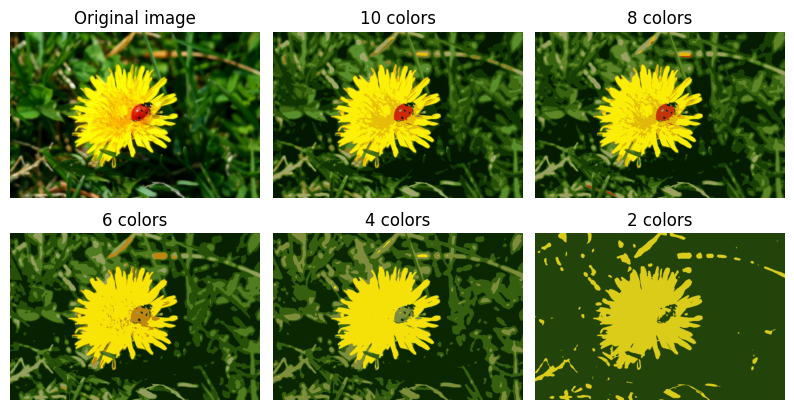

In [39]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

**Another use case for clustering is semi-supervised learning**
- Unsupervised learning, where we have plenty of unlabeled instances and very few labeled instances.

In [40]:
from sklearn.datasets import load_digits

In [41]:
X_digits, y_digits = load_digits(return_X_y=True)

In [42]:
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:],y_digits[1400:]

We'll pretend we only have labels for 50 instances. To get a baseline performance, lets train a logistic regression model on these 50 labeled instances.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
n_labeled = 50

In [45]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [46]:
# measure the accuracy of this model on the test set:
log_reg.score(X_test, y_test)

0.7481108312342569

Let's cluster the training set into 50 clusters, then for each cluster - find the image closest to the centroid. 

In [47]:
k = 50
kmeans = KMeans(n_clusters=50, random_state=42)

In [48]:
X_digits_dist = kmeans.fit_transform(X_train)

In [49]:
X_digits_dist.shape

(1400, 50)

In [50]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [51]:
X_representative_digits = X_train[representative_digit_idx]

**DBSCAN:**
- Density-based spatial clustering of applications with noise (DBSCAN) algorithm defines clusters as continuous regions of high density. 

- For each instance, the algorithm counts how many instances are located within a small distance (epsilon) from it. This region is called the instance's e-neighborhood
- If an instance has at least min_samples instances in its e-neighborhood (including itself), its considered a core instance. Core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore a long sequence of neighboring core instances forms a single cluster.
- Any instance that is not a core instance and does not have one in its neighborhood is an anomaly.

This algorithm works well if all the clusters are well separated by low-density regions. 

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [53]:
X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

**DBSCAN also uses the euclidean distance - to determine if a sample is a core sample - i.e. if a sample has min_samples within its neighborhood, all within the set epsilon distance**

In [54]:
# get the labels
dbscan.labels_

array([ 0,  1,  2,  2,  0,  2,  3,  4,  3,  2,  2,  1,  4,  2,  0,  2,  0,
       -1,  3,  1,  2,  4,  3,  2,  2,  4,  2,  0,  3,  2,  1, -1,  2,  0,
        2,  0,  2,  1,  2,  2,  0,  5,  1,  1,  0,  2,  3,  1,  2,  1,  0,
        3,  5,  2,  2,  4,  3,  2,  2, -1,  2,  2,  1, -1,  0,  1,  0,  4,
        0,  0,  1,  0,  2,  0,  3,  0,  4,  2,  2,  4,  5,  0,  6,  2,  0,
        0,  2, -1,  1,  2,  3,  0,  2,  1,  1,  1,  0,  2,  3,  2,  0,  2,
        2,  2,  5,  3,  1,  2,  0,  2,  1,  3,  0,  0,  2,  0,  2,  3,  0,
        0,  3,  2,  0,  2,  0,  0,  2,  0,  3,  1,  0,  4,  0,  2,  0,  2,
        3,  2,  0,  4,  2,  0,  2,  0,  4,  2,  2,  0,  3,  3,  0,  3,  2,
        2,  2,  2,  2,  4,  2,  0,  0,  1,  0,  2,  0,  1,  2,  0,  5,  5,
        2,  2,  0,  0,  4,  2,  1,  4,  0, -1,  1,  2,  2,  2,  2, -1,  2,
        0,  4,  1,  2,  0,  0,  4,  0,  0,  2,  0,  3,  2,  3,  3,  3,  3,
        0,  3,  3,  0,  0,  0, -1,  3,  3,  0,  2,  0, -1,  0,  2,  4,  2,
        2,  6,  1,  2,  2

Some instances have a cluster index equal to -1 => meaning they are considered anomalies by the algorithm. The indices of the core instances are available in the core_sample_indices_ instance variable and the core instances themselves in the components_ instance variable:

In [55]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
        29,  30,  32,  34,  35,  37,  38,  42,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  57,  58,  60,  61,  62,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,
        80,  81,  83,  84,  85,  86,  89,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 113, 114, 115, 116, 117, 118, 119, 121, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180,
       181, 182, 183, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 20

In [56]:
dbscan.components_

array([[ 1.4070812 , -0.37175258],
       [ 0.02267911,  0.36905828],
       [-0.40804359,  0.88723805],
       ...,
       [ 0.5399581 ,  0.81324413],
       [-0.75660717,  0.75069989],
       [ 1.96454041,  0.10161551]])

DBSCAN does not have a predict() method. Although, it has a fit_predict() method. DBSCAN cannot predict which cluster a new instance belongs to. The decision was made because different classification algorithms can be better for different tasks. 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=50)

In [59]:
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few instances - we can predict which clusters they most likely belong to and even estimate a probability for each cluster:

In [60]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [61]:
knn.predict(X_new)

array([4, 1, 5, 3], dtype=int64)

In [62]:
knn.predict_proba(X_new)

array([[0. , 0.3, 0. , 0. , 0.7, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0.3, 0. , 0. , 0. , 0. , 0.7, 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ]])

DBSCAN - robust to outliers and has 2 hyperparameters - epsilon and min_samples. 
If the density varies significantly across the clusters, howevever, or if there's no sufficiently lower density region around some clusters, DBSCAN can struggle to capture all the clusters properly. Moreover, its computational complexity is roughly O(m2n), so it doesn't scale well to large datasets. 

**Gaussian Mixtures:**
- Assumes that the instances were generated from a mixture of several gaussian distributions whose parameters are unknown.
- All the instances generated from a single gaussian distribution form a cluster that typically looks like an ellipsoid
- Each cluster can have a different ellipsoidal shape, size, density and orientation
- When you observe an instance, you know it was generated from one of the gaussian distributions, but you are not told which one, and you don't know what the parameters of these distributions are. 

There's several GMM variants. In the simplest variant - you must know the number k of gaussian distributions. The dataset X is assumed to have been generated through the following probabilistic process:
- For each instance, a cluster is picked randomly from among k clusters.The probability of choosing the the jth cluster is the cluster's weight. The index of the cluster chosen for the ith instance is noted.

- Given a dataset X, you typically want to start by estimating the weights  phi and all distribution parameters.

In [63]:
from sklearn.mixture import GaussianMixture

In [64]:
gm = GaussianMixture(n_components=3, n_init=10)

In [65]:
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [66]:
gm.weights_

array([0.1996143 , 0.21245976, 0.58792594])

In [67]:
gm.means_

array([[ 1.75231171, -0.05870632],
       [-0.72712786,  0.578204  ],
       [ 0.51546624,  0.23321466]])

In [68]:
gm.covariances_

array([[[ 0.04759104,  0.05881787],
        [ 0.05881787,  0.0870161 ]],

       [[ 0.06187744,  0.06811193],
        [ 0.06811193,  0.0898793 ]],

       [[ 0.1683188 , -0.09921822],
        [-0.09921822,  0.28480769]]])

In [69]:
gm.converged_

True

In [70]:
gm.n_iter_

15

Now we can assign instances to classes:
- Just use the predict method for hard clustering and predict_proba for soft clustering

In [71]:
gm.predict(X)

array([0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1,
       1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2,

In [72]:
gm.predict_proba(X)

array([[8.32579758e-001, 1.14182617e-174, 1.67420242e-001],
       [2.04971590e-113, 1.37281583e-017, 1.00000000e+000],
       [7.35357331e-220, 9.25549099e-001, 7.44509005e-002],
       ...,
       [1.33499519e-260, 9.87291905e-001, 1.27080946e-002],
       [3.58850059e-194, 1.35747442e-001, 8.64252558e-001],
       [9.99439628e-001, 3.54632406e-198, 5.60371648e-004]])

A Gaussian Mixture Model is a generative model - meaning you can sample new instances from it. (note that they are ordered by cluster index)

In [73]:
X_new, y_new = gm.sample(6)

In [74]:
X_new

array([[ 1.64716836, -0.22100544],
       [-0.58454704,  0.74241567],
       [-0.45761348,  0.92270899],
       [ 1.10588781, -0.21477281],
       [ 0.8651602 , -0.40637899],
       [ 0.88055236, -0.47625487]])

In [75]:
y_new

array([0, 1, 1, 2, 2, 2])

It is also possible to estimate the density of the model at any given location. this is achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function at that location. the greater the score, the higher the density

In [77]:
X.shape

(1000, 2)

In [79]:
gm.score_samples(X).round(2)

array([-1.32, -1.51, -0.7 ,  0.03, -1.71, -1.56,  0.12, -0.12,  0.11,
       -2.  , -1.3 , -1.46, -0.24, -0.7 , -1.76, -0.43, -0.51, -1.16,
       -1.86, -1.81, -2.18, -0.36, -0.45, -1.89, -1.48, -0.1 , -1.85,
       -1.13,  0.01, -1.52, -1.42, -1.71, -1.5 , -1.4 , -0.89, -1.99,
       -1.72, -1.33, -1.6 , -2.2 , -1.38, -1.77, -1.99, -1.45, -1.94,
       -0.84, -0.2 , -1.84, -0.91, -1.71, -1.02, -1.26, -1.52, -1.65,
       -1.65, -2.89, -0.71, -1.61, -1.49, -1.12, -1.84, -0.96, -1.61,
       -1.9 , -2.13, -1.92, -0.34, -0.38, -0.69, -1.68, -1.7 , -0.05,
       -1.72, -1.47, -0.11, -1.65, -2.73, -2.03, -1.58, -0.13, -1.27,
       -1.95, -1.26, -1.58, -1.98, -1.57, -1.5 , -0.53, -1.3 ,  0.01,
       -0.21, -0.5 , -1.55, -1.54, -1.39, -1.87, -1.54, -1.88, -0.09,
       -1.51, -1.45, -1.95, -1.47, -0.75, -1.61, -0.59, -2.  , -1.58,
       -1.71, -0.56, -1.73,  0.12, -1.84, -2.13, -1.8 , -0.4 , -0.44,
       -0.1 , -2.25, -1.73,  0.18, -1.92, -1.24, -1.76, -0.56, -1.32,
       -0.6 , -1.52,

**using gaussian mixtures for anomaly detection:**
- GMM for anomaly detection: any instance located in a low-density region can be considered an anomaly. Must define what density threshold you want to use. 

In [81]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,2)
anomalies = X[densities < density_threshold]

Gaussian Mixture models try to fit all the data, including the outliers; if you have too many of them this will bias the model's view of "normality", and some outliers may wrongly be considered as normal. If this happens, you can try to fit the model ince, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned up dataset.

**Selecting the Number of Clusters:**
- With k-means => use inertia or silhoutte score to select the appropriate number of clusters. but with gaussian mixtures, its not possible to use these metrics because they aren't reliable when the clusters are not spherical or have different sizes. Instead you can try to find the model that minimizes a theoretical information criterion, such as the Bayesian Information criterion (BIC) or the Akaike information criterion (AIC)

In [82]:
gm.bic(X)

2728.7407273695576

In [83]:
gm.aic(X)

2645.308887626861

Lower the gic and aic - the better.
Compute and compare for different clusters - choose lowest point for gic and aic.
try to go with aic

**Bayesian Gaussian Mixture Models:**
- Rather than manually searching for the optimal number of clusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of cluters, and the algorithm will eliminate the unnecessary clusters automatically. For example, let's set the number of clusters to 10 and see what happens:

In [84]:
from sklearn.mixture import BayesianGaussianMixture

In [85]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [86]:
bgm.fit(X)

c:\Users\blais\Documents\ML\venv2\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [87]:
bgm.weights_.round(2)

array([0.12, 0.14, 0.12, 0.18, 0.17, 0.07, 0.  , 0.09, 0.1 , 0.  ])

Final note about GMM models:
- although they work well on clusters with ellipsoidal shapes, they don't do so well with clusters of different shapes.